## Code Description

This code performs exploratory data analysis, implements logistic regression, and compares the results with the scikit-learn implementation on the "diabetes" dataset.


In [1]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('diabetes.csv')

In [7]:
#exploratory data analysis
#find missing values
print(data.isnull().sum())
#find data types
print(data.dtypes)
#describe data
print(data.describe())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   

In [9]:
#find negative values in any column
print((data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
                'Age']] < 0).sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


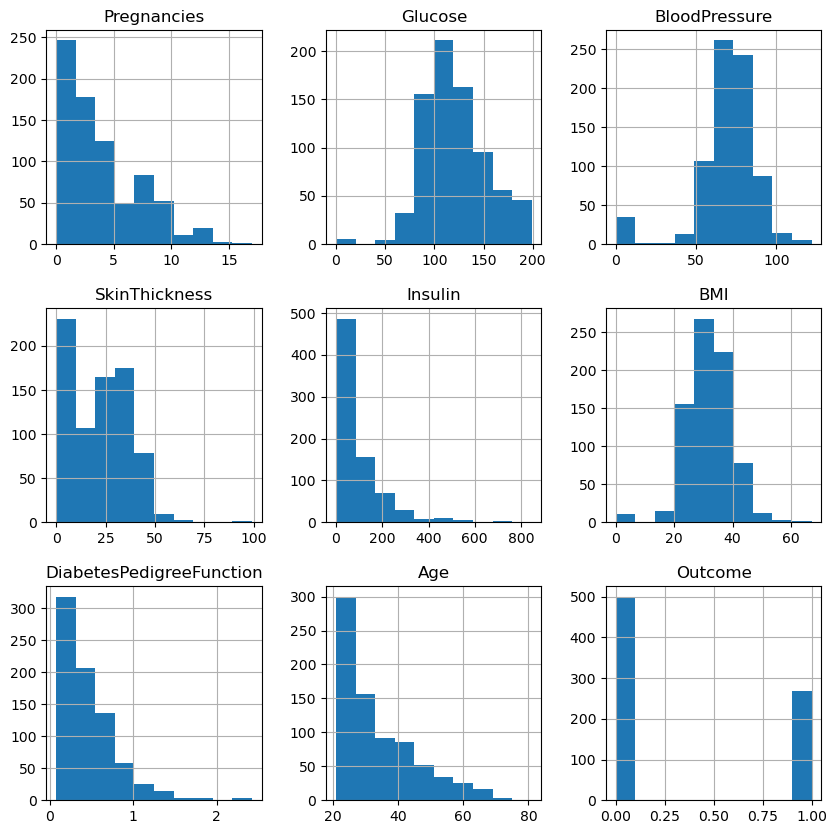

In [10]:
#visualize data
#plot histogram of each column
data.hist(figsize=(10,10))
plt.show()

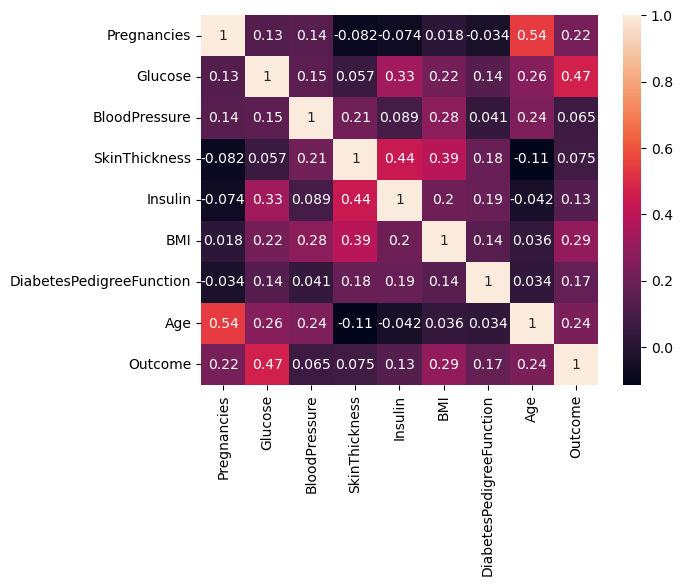

In [11]:
#plot correlation matrix
sns.heatmap(data.corr(), annot=True)
plt.show()


In [12]:
#find which variables are most correlated with outcome
print(data.corr()['Outcome'].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [77]:
#split variables into X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']
#convert into nupy array
X = X.values
y = y.values
#standardize X
X = (X - X.mean()) / X.std()
#split data into training and testing sets 80% training, 20% testing
X_train = X[:614]
y_train = y[:614]
X_test = X[614:]
y_test = y[614:]
#stack a column of ones to X_train
ones = np.ones((614,1))
X_train = np.hstack((ones, X_train))
#stack a column of ones to X_test
ones = np.ones((154,1))
X_test = np.hstack((ones, X_test))
#print shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)
#reshape y_train and y_test
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))
#print shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)


(614, 9)
(154, 9)
(614, 1)
(154, 1)


In [78]:
#implement logistic regression
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#hypothesis function
def hypothesis(theta, x):
    return sigmoid(np.dot(x, theta))
#cost function
def cost_function(theta, x, y):
    m = X.shape[0]
    y_ = hypothesis(theta, x)
    cost = np.mean(y*np.log(y_) + (1-y)*np.log(1-y_))
    cost = -1*cost
    return cost
#gradeint function
def gradient(theta, x, y):
    m = X.shape[0]
    y_ = hypothesis(theta, x)
    grad = np.dot(x.T, (y - y_))
    return grad/m
#gradient descent function for logistic regression
def gradient_descent(theta, x, y, alpha, iterations):
    n = X.shape[1]
    theta = np.zeros((n+1,1))
    cost_epoch = []
    for i in range(iterations):
        grad = gradient(theta, x, y)
        e = cost_function(theta, x, y)
        cost_epoch.append(e)
        theta = theta + (alpha*grad)
    return theta, cost_epoch



In [86]:
theta, cost_epoch = gradient_descent(theta, X_train, y_train, 0.01, 10000)


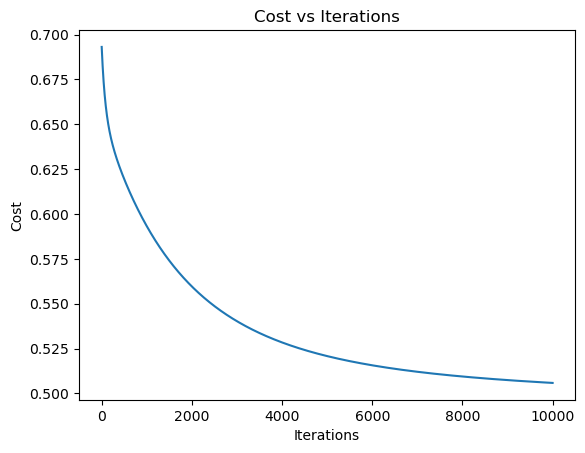

In [87]:
#plot cost vs iterations
plt.plot(cost_epoch)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()



In [88]:
#predict on test set
y_pred = hypothesis(theta, X_test)
#convert probabilities to 0 or 1
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
#calculate accuracy
accuracy = (y_pred == y_test).mean()

print(accuracy)

0.7857142857142857


In [76]:
#transform X & Y for sklearn
X = data.drop('Outcome', axis=1)
y = data['Outcome']
#convert into nupy array
X = X.values
y = y.values
#standardize X
X = (X - X.mean()) / X.std()
#split data into training and testing sets 80% training, 20% testing
X_train = X[:614]
y_train = y[:614]
X_test = X[614:]
y_test = y[614:]

#use sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(accuracy)


0.7792207792207793
